In [1]:
from utils.csv_to_pd import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = read_dir_csv()
df = mean_10min(df)


In [3]:
from sklearn.preprocessing import StandardScaler

# 指定要標準化的欄位
columns_to_standardize = ['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)']

# 初始化 StandardScaler
scaler = StandardScaler()

# 對指定欄位進行標準化
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [4]:
df[:3]

,DateTime,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,2024-03-01 17:10:00,10,-0.284717,0.741951,-1.640724,0.974532,-0.721713,0.115714
1,2024-03-01 17:20:00,10,-0.011076,0.737948,-1.640932,0.984225,-0.728691,0.063000
2,2024-03-01 17:30:00,10,-0.388981,0.744134,-1.650213,1.002961,-0.734502,0.022000


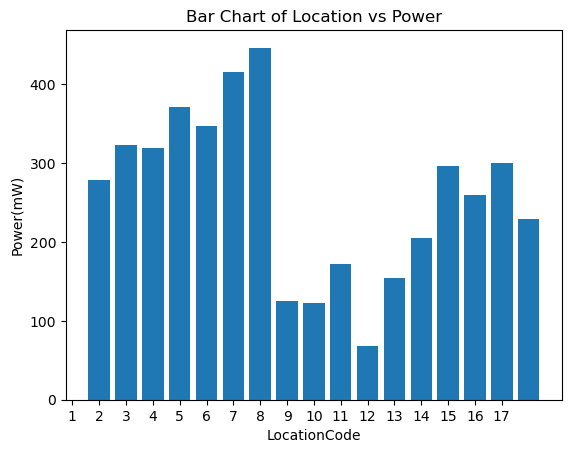

In [5]:
location_df = df.groupby('LocationCode').mean().reset_index()

# 繪製柱狀圖
plt.bar(location_df['LocationCode'], location_df['Power(mW)'])

# 添加標題和軸標籤
plt.title('Bar Chart of Location vs Power')
plt.xlabel('LocationCode')
plt.ylabel('Power(mW)')
plt.xticks(ticks=range(len(location_df)), labels=location_df['LocationCode'])
# 顯示圖表
plt.show()

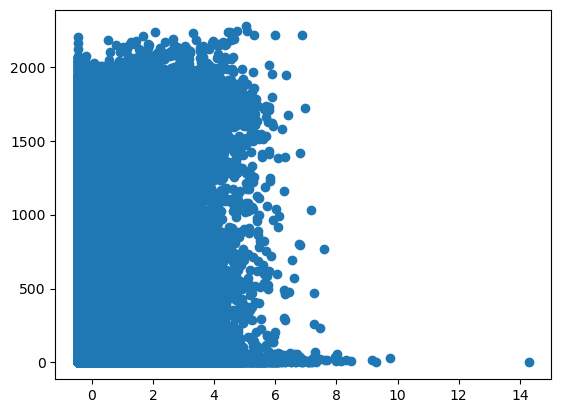

In [6]:
plt.scatter(df['WindSpeed(m/s)'], df['Power(mW)'])
plt.show()



C:\Users\weiso131\AppData\Local\Temp\ipykernel_13520\3821790614.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pressure = df[df['Pressure(hpa)'] < 2][df['Pressure(hpa)'] > -2]


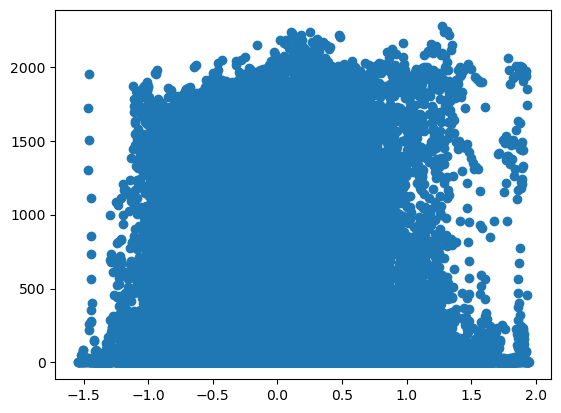

In [23]:
pressure = df[df['Pressure(hpa)'] < 2][df['Pressure(hpa)'] > -2]

plt.scatter(pressure['Pressure(hpa)'], pressure['Power(mW)'])
plt.show()

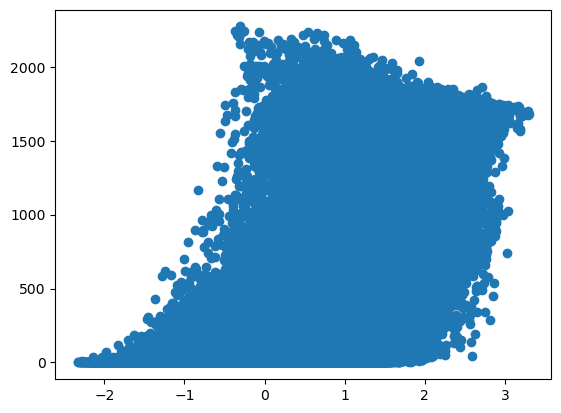

In [8]:
plt.scatter(df['Temperature(°C)'], df['Power(mW)'])
plt.show()

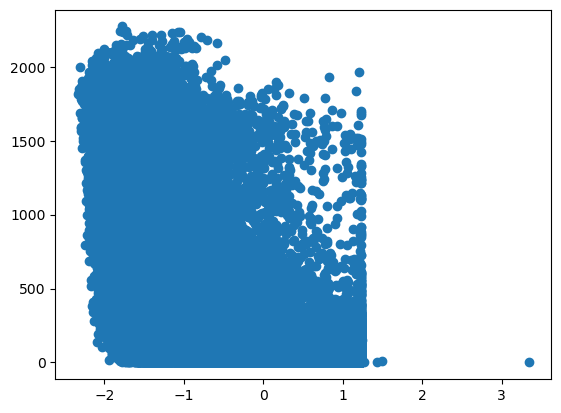

In [9]:
plt.scatter(df['Humidity(%)'], df['Power(mW)'])
plt.show()

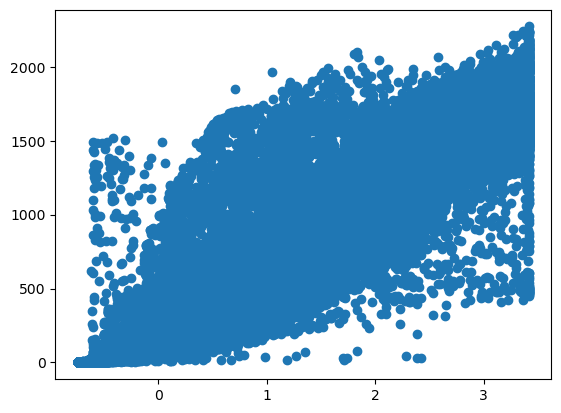

In [11]:
plt.scatter(df["Sunlight(Lux)"], df['Power(mW)'])
plt.show()

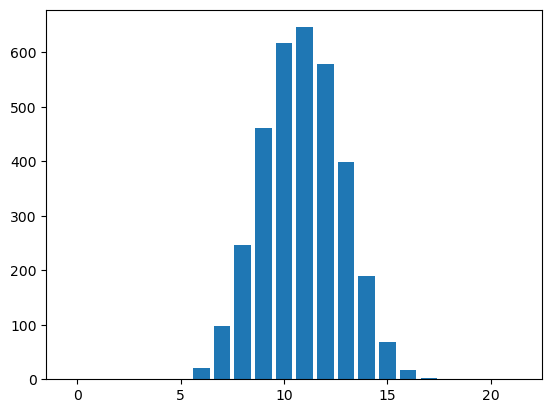

In [15]:
df['hour'] = df['DateTime'].dt.hour
hour_group = df.groupby('hour').mean().reset_index()
plt.bar(hour_group['hour'], hour_group['Power(mW)'])
plt.show()

1


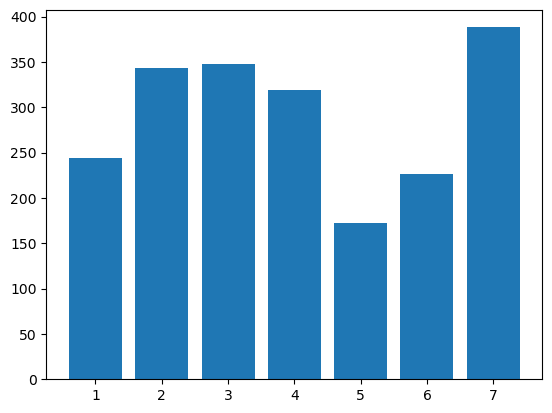

2


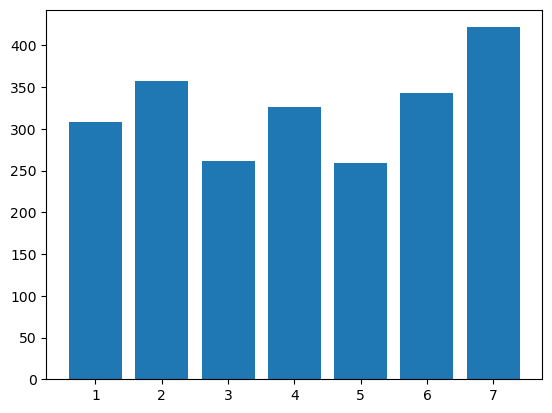

3


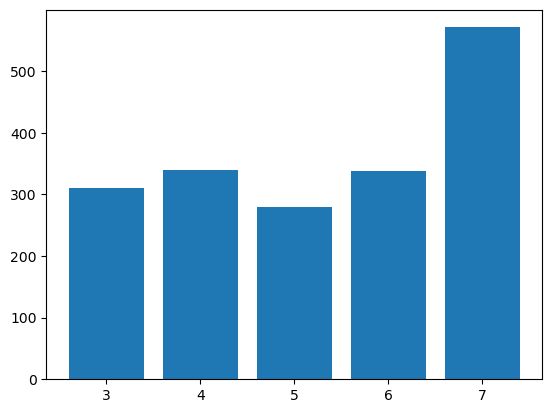

4


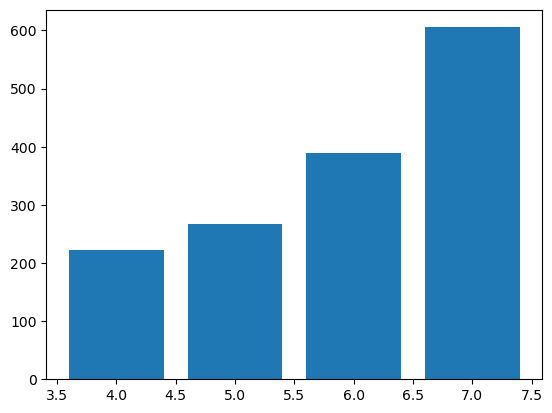

5


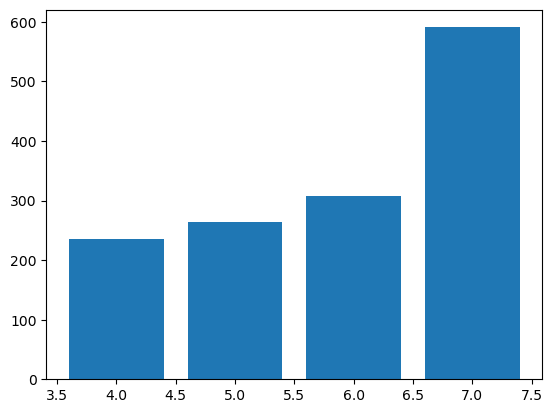

6


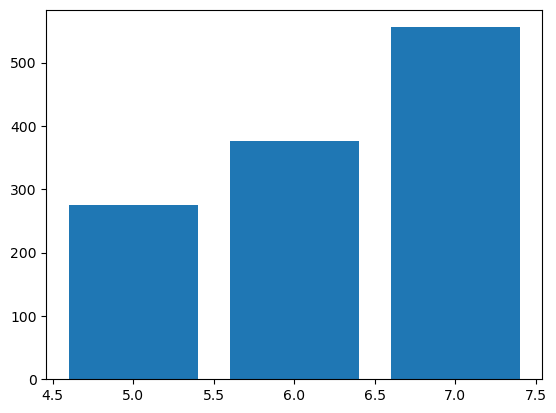

7


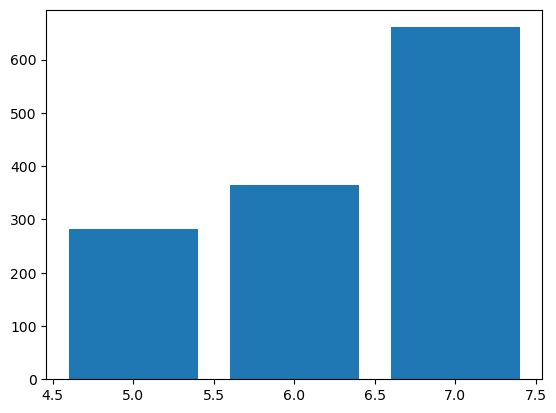

8


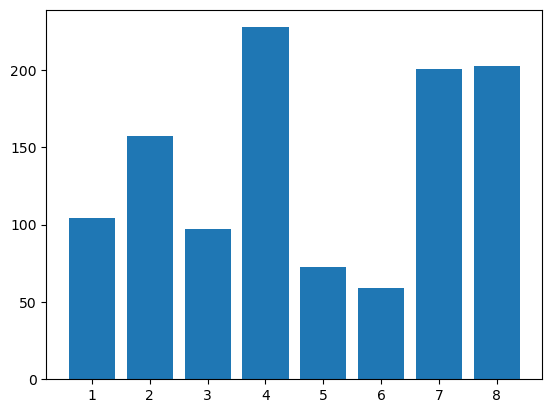

9


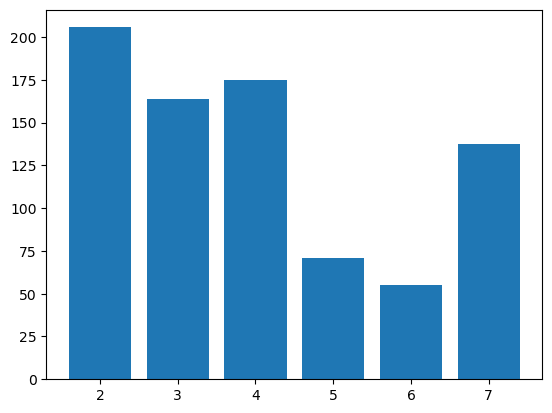

10


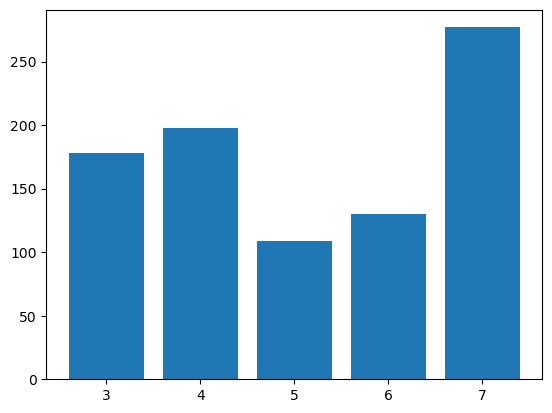

11


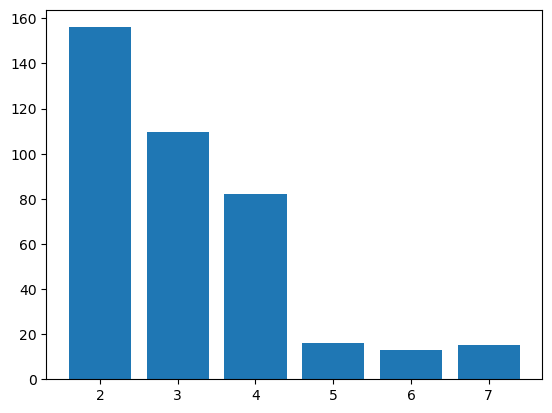

12


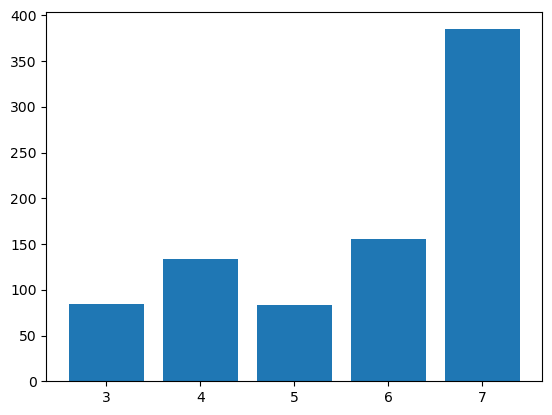

13


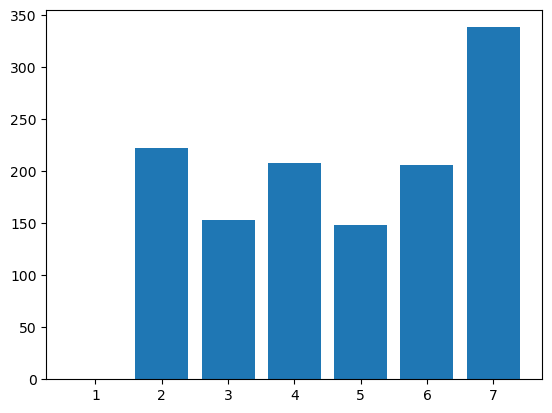

14


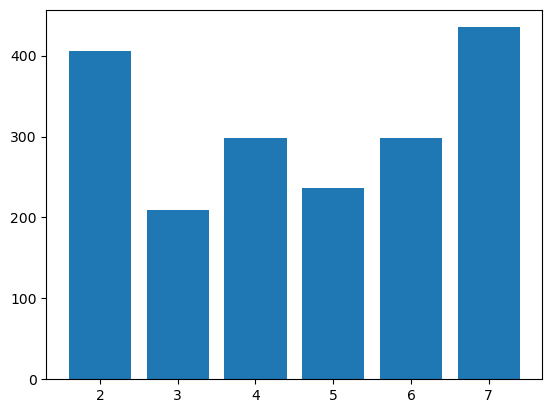

15


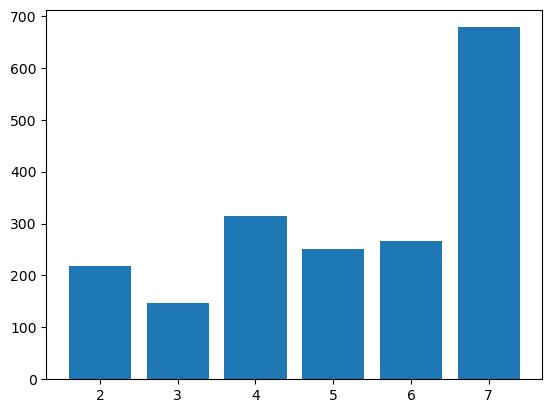

16


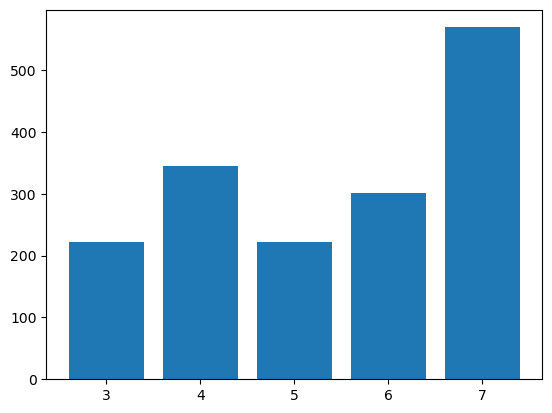

17


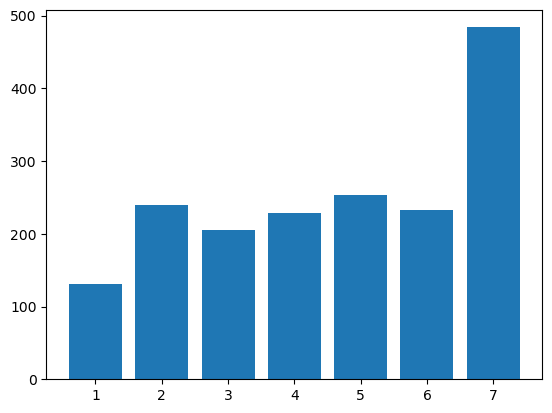

In [18]:
df['month'] = df['DateTime'].dt.month
month_group = df.groupby(['LocationCode', 'month']).mean().reset_index()

locations = list(month_group['LocationCode'].unique())

for location in locations:
    print(location)
    location_data = month_group[month_group['LocationCode'] == location]
    plt.bar(location_data['month'], location_data['Power(mW)'])
    plt.show()

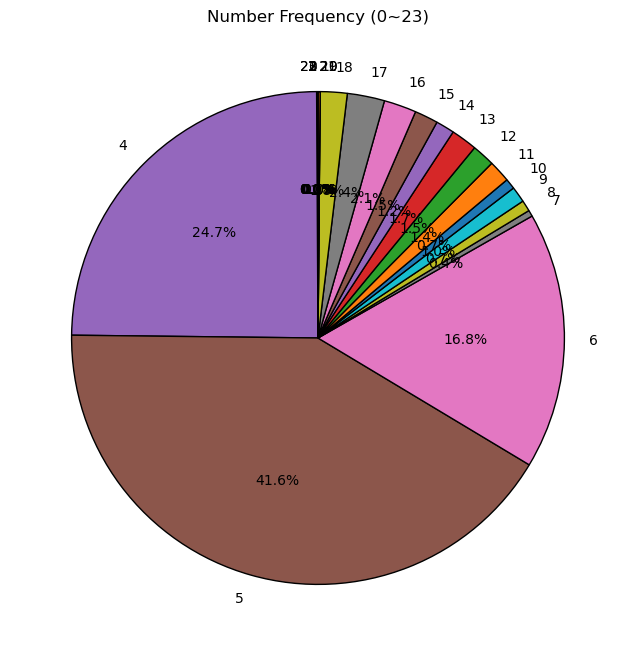

In [5]:
location_ori = list(df["LocationCode"]) 
data_list, label_list, start_time = spilt_data_with_datetime(df, location_ori)

count = Counter(start_time)

# 確保包含所有 0~23 的數字，即使次數為 0
full_count = {i: count.get(i, 0) for i in range(24)}

# 分別提取數字（標籤）和次數（數據）
labels = list(full_count.keys())
sizes = list(full_count.values())

# 繪製圓餅圖
plt.figure(figsize=(8, 8))  # 設定圖表大小
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # 自動顯示百分比
    startangle=90,      # 起始角度
    wedgeprops={'edgecolor': 'black'}  # 添加邊框
)

# 添加標題
plt.title('Number Frequency (0~23)')

# 顯示圖表
plt.show()